### Importing Libraries

In [99]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
import tensorflow as tf
import os
import cv2
import imghdr

# Importing DL Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

%matplotlib inline

### Importing Data

### 

In [52]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### Removing dodgy images

In [53]:
data_dir = 'Resources'

In [54]:
image_exts = ['jpeg','jpg','png','bmp']

In [55]:
os.listdir(data_dir)

['happy', 'sad']

In [56]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        # print(image_path)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)

        except Exception as e:
            print(f'Issue with image {image_path}')

In [57]:
os.listdir(os.path.join(data_dir,'happy'))

['-woman-looking-at-camera-with-crossed-arms-happy-girl-standing-in-1865153395.jpg',
 '05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Supremely-Happy-People-1.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '35443_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL._AC_UF10001000_QL80_.jpg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-3941

### Load Data

In [58]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [59]:
''' We cannot access this data's elements with data[0], it basically created a "Generator" so firstly we need
    to convert it to an iterator, so that we can access the elements of the data. '''
data = tf.keras.utils.image_dataset_from_directory('Resources')

Found 690 files belonging to 2 classes.


In [60]:
data_iterator = data.as_numpy_iterator()

In [61]:
# Get new Batch of Data,each batch consist of 32 images (by Default)
batch = data_iterator.next()

In [62]:
batch

(array([[[[2.45000000e+02, 2.41000000e+02, 2.29000000e+02],
          [2.45000000e+02, 2.41000000e+02, 2.29000000e+02],
          [2.44000000e+02, 2.41000000e+02, 2.26000000e+02],
          ...,
          [7.80168228e+01, 5.49465103e+01, 4.51789322e+01],
          [6.14667969e+01, 4.83457031e+01, 4.22851562e+01],
          [4.50605469e+01, 3.40605469e+01, 3.20605469e+01]],
 
         [[2.45000000e+02, 2.41000000e+02, 2.29000000e+02],
          [2.45000000e+02, 2.41000000e+02, 2.29000000e+02],
          [2.45000000e+02, 2.42000000e+02, 2.27000000e+02],
          ...,
          [6.83567963e+01, 4.85097656e+01, 4.10787506e+01],
          [5.49540939e+01, 4.32119064e+01, 3.71669693e+01],
          [4.38557968e+01, 3.34847031e+01, 3.14847031e+01]],
 
         [[2.45000000e+02, 2.41000000e+02, 2.29000000e+02],
          [2.45000000e+02, 2.41000000e+02, 2.29000000e+02],
          [2.45000000e+02, 2.41000000e+02, 2.29000000e+02],
          ...,
          [5.59473953e+01, 4.24377594e+01, 3.4337

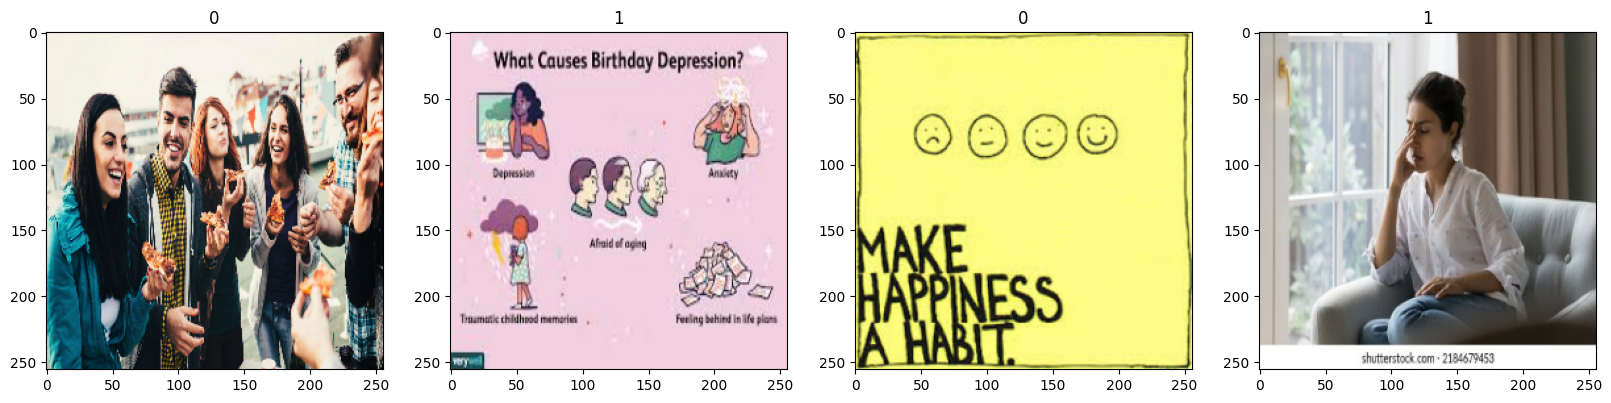

In [63]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))

for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [64]:
batch[0].shape

(32, 256, 256, 3)

### Data Preprocessing

In [65]:
data = data.map(lambda x,y: (x/255,y))

In [66]:
scaled_iterator = data.as_numpy_iterator()

In [67]:
batch = scaled_iterator.next()

In [68]:
batch[0].min()

0.0

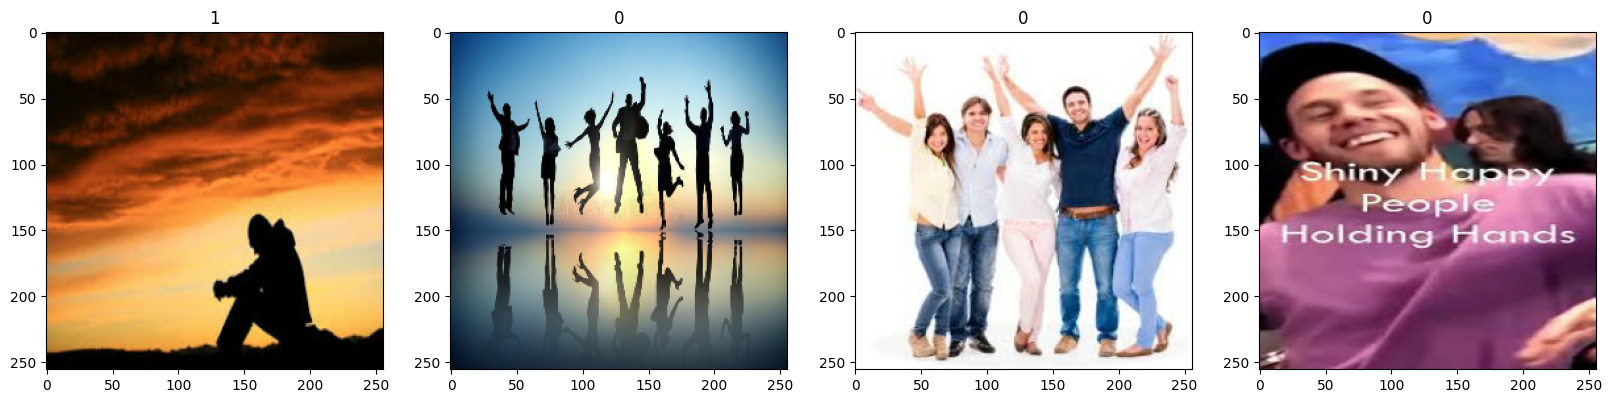

In [69]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))

for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Train Test Validation Split

In [81]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [82]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### Model Building

#### Building Deep Learning Model

In [84]:
model = Sequential()

//

In [87]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\2160278\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [88]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 815,361 (3.11 MB)

 Trainable params: 815,361 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

#### Training Model

In [90]:
logdir = 'logs'

In [91]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [92]:
#  Model History
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 395ms/step - accuracy: 0.5921 - loss: 0.6839 - val_accuracy: 0.6250 - val_loss: 0.6599
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 416ms/step - accuracy: 0.6063 - loss: 0.6501 - val_accuracy: 0.6250 - val_loss: 0.6525
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 399ms/step - accuracy: 0.6761 - loss: 0.6114 - val_accuracy: 0.7344 - val_loss: 0.5120
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 429ms/step - accuracy: 0.7186 - loss: 0.5339 - val_accuracy: 0.7500 - val_loss: 0.5085
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.7143 - loss: 0.5351 - val_accuracy: 0.8203 - val_loss: 0.4747
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.7951 - loss: 0.4571 - val_accuracy: 0.8203 - val_loss: 0.4240
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step - accuracy: 0.8192 - loss: 0.4383 - val_accuracy: 0.7969 - val_loss: 0.4207
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.8190 - loss: 0.3685 - val_accuracy: 0

In [96]:
hist.history

{'accuracy': [0.6000000238418579,
  0.6416666507720947,
  0.6833333373069763,
  0.7166666388511658,
  0.7166666388511658,
  0.7854166626930237,
  0.8166666626930237,
  0.8229166865348816,
  0.862500011920929,
  0.9083333611488342,
  0.8791666626930237,
  0.925000011920929,
  0.9520833492279053,
  0.9333333373069763,
  0.9291666746139526,
  0.949999988079071,
  0.9666666388511658,
  0.981249988079071,
  0.9750000238418579,
  0.9937499761581421],
 'loss': [0.6757485270500183,
  0.6331804990768433,
  0.5839511752128601,
  0.5388669371604919,
  0.5430144667625427,
  0.4585849642753601,
  0.42580491304397583,
  0.3665916323661804,
  0.32377737760543823,
  0.2652970254421234,
  0.26192429661750793,
  0.21125860512256622,
  0.13738025724887848,
  0.15173909068107605,
  0.17497581243515015,
  0.1375674307346344,
  0.09804292768239975,
  0.07615026831626892,
  0.07096388190984726,
  0.03232850134372711],
 'val_accuracy': [0.625,
  0.625,
  0.734375,
  0.75,
  0.8203125,
  0.8203125,
  0.796875,

### Plotting Performance

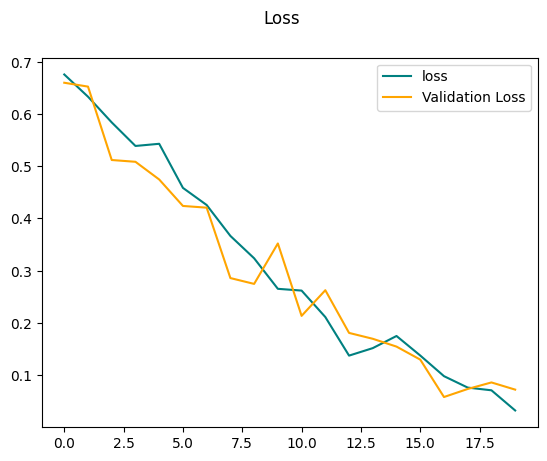

In [98]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Validation Loss')
plt.suptitle('Loss')
plt.legend(loc='upper right')
plt.show()

#### Evaluating Model

In [100]:
pre = Precision()
re = Recall()
bacc = BinaryAccuracy()

In [101]:
for batch in test.as_numpy_iterator():
    X,y = batch
    y_pred = model.predict(X)
    pre.update_state(y,y_pred)
    re.update_state(y,y_pred)
    bacc.update_state(y,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [106]:
print(f"Precision: {pre.result().numpy()}\nRecall: {re.result().numpy()}\nAccuracy: {bacc.result().numpy()}")

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


### Testing Model

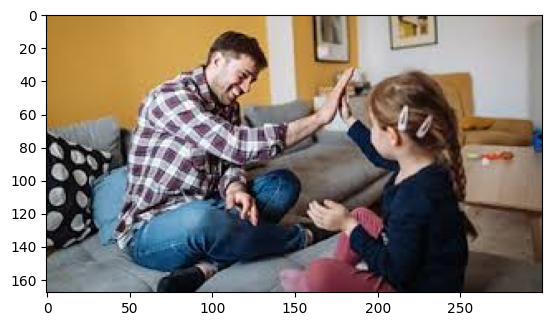

In [109]:
img = cv2.imread(r"C:\Users\2160278\Downloads\test.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

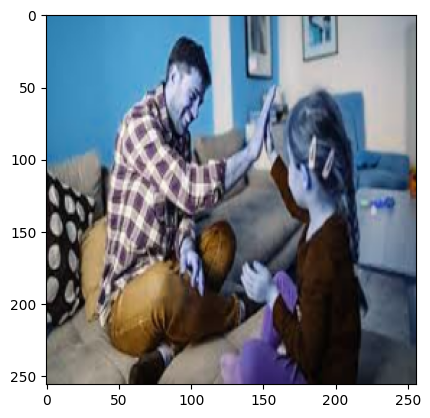

In [114]:
resize = tf.image.resize(img,(256,256))
# plt.imshow(cv2.cvtColor(resize.numpy().astype(int),cv2.COLOR_BGR2RGB))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
y_pred = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [117]:
y_pred

array([[0.06695427]], dtype=float32)

In [118]:
if y_pred > 0.5:
    print('Pred is Sad')
else:
    print('Pred is Happy')

Pred is Happy


### Saving the Model

In [120]:
from tensorflow.keras.models import load_model

In [121]:
model.save(os.path.join('models','imageClassifier.h5'))

#### Reloading Model

In [122]:
model_reload = load_model(os.path.join('models','imageClassifier.h5'))

In [124]:
reloaded_model_ypred = model_reload.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [125]:
if reloaded_model_ypred > 0.5:
    print('Sad')
else:
    print('Happy')

Happy
